Data ingeladen ✅
Visits: 2000, Cart: 348, Checkout: 226, Purchase: 252
➡️ 82.6% van de bezoekers stopte niks in hun cart
➡️ 35.1% van de cart-users ging niet door naar checkout
➡️ 24.6% van de checkout-users kochten niks
⏱️ Gemiddelde tijd van bezoek tot aankoop: 0 days 00:43:12.380952380


C:\Users\rasto\AppData\Local\Temp\ipykernel_28956\1021521718.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Step', y='Users', data=funnel_df, palette='viridis')


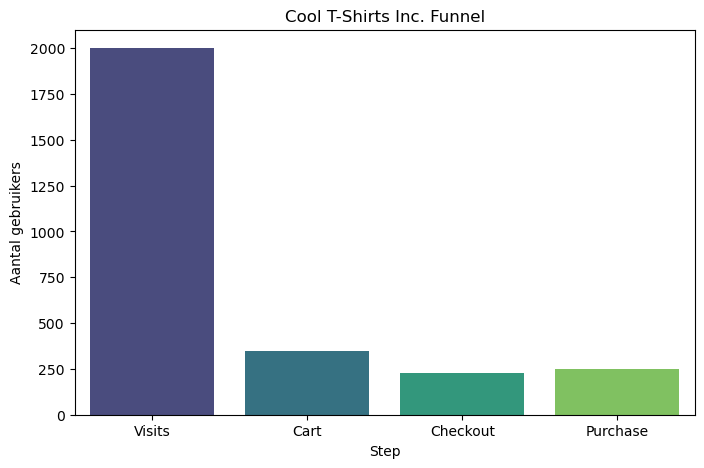

C:\Users\rasto\AppData\Local\Temp\ipykernel_28956\1021521718.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Funnel Step', y='Drop-off %', data=dropoff_df, palette='magma')


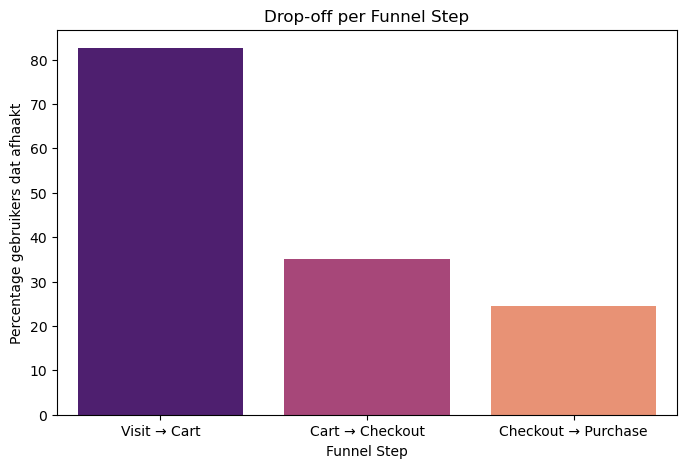

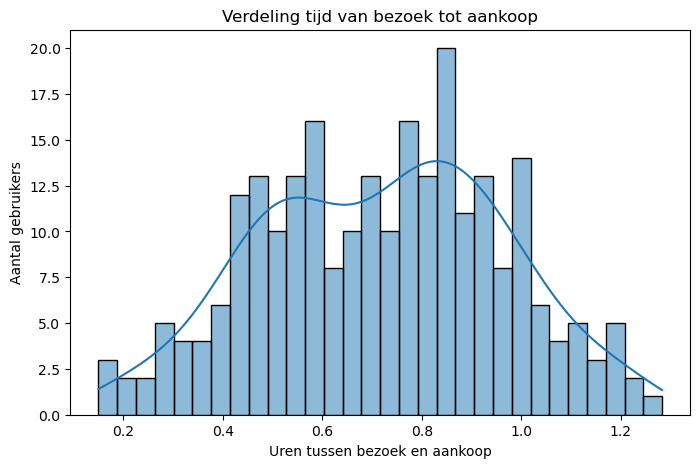

In [59]:
# 📊 Funnel Analysis Project: Cool T-Shirts Inc.
# Author: [jouw naam]
# Doel: Funnel-analyse uitvoeren en visualiseren voor GitHub portfolio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. Data inladen
# ========================

visits = pd.read_csv('visits.csv', parse_dates=[1])
cart = pd.read_csv('cart.csv', parse_dates=[1])
checkout = pd.read_csv('checkout.csv', parse_dates=[1])
purchase = pd.read_csv('purchase.csv', parse_dates=[1])

print("Data ingeladen ✅")
print(f"Visits: {len(visits)}, Cart: {len(cart)}, Checkout: {len(checkout)}, Purchase: {len(purchase)}")

# ========================
# 2. Funnel stap 1: Visits → Cart
# ========================

visits_cart_combined = pd.merge(visits, cart, how='left')
no_cart = visits_cart_combined['cart_time'].isnull().sum()
percent_no_cart = no_cart / len(visits) * 100
print(f"➡️ {percent_no_cart:.1f}% van de bezoekers stopte niks in hun cart")

# ========================
# 3. Funnel stap 2: Cart → Checkout
# ========================

cart_checkout_combined = pd.merge(cart, checkout, how='left')
null_checkout = cart_checkout_combined['checkout_time'].isnull().sum()
percent_no_checkout = null_checkout / len(cart_checkout_combined) * 100
print(f"➡️ {percent_no_checkout:.1f}% van de cart-users ging niet door naar checkout")

# ========================
# 4. Funnel stap 3: Checkout → Purchase
# ========================

checkout_purchase = pd.merge(checkout, purchase, how='left')
null_purchase = checkout_purchase['purchase_time'].isnull().sum()
percent_no_purchase = null_purchase / len(checkout_purchase) * 100
print(f"➡️ {percent_no_purchase:.1f}% van de checkout-users kochten niks")

# ========================
# 5. Volledige funnel (alles mergen)
# ========================

all_data = visits \
    .merge(cart, how='left') \
    .merge(checkout, how='left') \
    .merge(purchase, how='left')

# Nieuwe kolom: tijd van bezoek tot aankoop
all_data['time_to_purchase'] = all_data['purchase_time'] - all_data['visit_time']
avg_time_to_purchase = all_data['time_to_purchase'].mean()
print(f"⏱️ Gemiddelde tijd van bezoek tot aankoop: {avg_time_to_purchase}")

# ========================
# 6. Funnel percentages visualiseren
# ========================

funnel_counts = {
    'Visits': len(visits),
    'Cart': len(cart),
    'Checkout': len(checkout),
    'Purchase': len(purchase)
}

funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['Step', 'Users'])

plt.figure(figsize=(8,5))
sns.barplot(x='Step', y='Users', data=funnel_df, palette='viridis')
plt.title("Cool T-Shirts Inc. Funnel")
plt.ylabel("Aantal gebruikers")
plt.show()

# ========================
# 7. Drop-off percentages visualiseren
# ========================

dropoffs = {
    'Visit → Cart': percent_no_cart,
    'Cart → Checkout': percent_no_checkout,
    'Checkout → Purchase': percent_no_purchase
}

dropoff_df = pd.DataFrame(list(dropoffs.items()), columns=['Funnel Step', 'Drop-off %'])

plt.figure(figsize=(8,5))
sns.barplot(x='Funnel Step', y='Drop-off %', data=dropoff_df, palette='magma')
plt.title("Drop-off per Funnel Step")
plt.ylabel("Percentage gebruikers dat afhaakt")
plt.show()

# ========================
# 8. Time to Purchase visualisatie
# ========================

plt.figure(figsize=(8,5))
sns.histplot(all_data['time_to_purchase'].dropna().dt.total_seconds()/3600, bins=30, kde=True)
plt.title("Verdeling tijd van bezoek tot aankoop")
plt.xlabel("Uren tussen bezoek en aankoop")
plt.ylabel("Aantal gebruikers")
plt.show()
